https://obliviateandsurrender.github.io/blogs/expr.html

In [1]:
%pip install sympy

In [2]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=8866c79dd87938f3c054ca59b18df95783ea399f34a2d568ab892576db34b7c2
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [3]:
%pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.9 MB/s eta 0:00:00


In [4]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 38.9 MB/s eta 0:00:00


In [5]:
import numpy as np
#from qiskit import *
import scipy as sp
from qiskit import QuantumCircuit, transpile
#Instead of importing from qiskit_aer directly, import from the simulator module.
from qiskit_aer import Aer
from qiskit_aer import AerSimulator # Importing the AerSimulator to be used with the execute function.
import qiskit

from tqdm import tqdm


# Função para gerar os circuitos escolhidos

  todos os circuitos recebem os parâmetros em um numpy array, unidimensional e com valores de parâmetos diferentes

######  ansatz1 = 4 parâmetros
######  ansatz2 = 8 parâmetros
######  ansatz3 = 28 parâmetros
######  ansatz4 = 28 parâmetros
######  ansatz5 = 11 parâmetros
######  ansatz6 = 12 parâmetros
######  ansatz7 = 11 parâmetros
######  ansatz8 = 8 parâmetros
######  ansatz9 = 12 parâmetros
######  ansatz10 = 12 parâmetros


In [6]:
# os 10 circuitos escolhidos

#todos os circuitos tem 4 qubits
num_qubits = 4

"""
todos os circuitos recebem os parâmetros em um numpy array, unidimensional e com valores de parâmetos diferentes

ansatz1 = 4 parâmetros
ansatz2 = 8 parâmetros
ansatz3 = 28 parâmetros
ansatz4 = 28 parâmetros
ansatz5 = 11 parâmetros
ansatz6 = 12 parâmetros
ansatz7 = 11 parâmetros
ansatz8 = 4 parâmetros
ansatz9 = 12 parâmetros
ansatz10 = 12 parâmetros

"""
# o primeiro circuito particularmente, tem a maior métrica de espressibilidade e emaranhamento, o circuito 9
def ansatz1(params):


    ansatz = QuantumCircuit(num_qubits, num_qubits)

    # aplicar Hadamard a todos os qubits
    ansatz.h([0, 1, 2, 3])


    # cnot em todos os quibits
    ansatz.cz(2, 3)
    ansatz.cz(1, 2)
    ansatz.cz(0, 1)

    #rx em todas as portas
    for idx in range(num_qubits):

      ansatz.rx(params[idx], idx)


    return ansatz

# o segundo circuito, alta expressibilidade e baixo emaranhamento, o circuito 1
def ansatz2(params):

    params = params.reshape(2, 4)

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    for i in range(num_qubits):

      ansatz.rx(params[0][i], i)

    for i in range(num_qubits):

      ansatz.rz(params[1][i], i)


    return ansatz


# o terceiro circuito, baixa expressibilidade e baixo emaranhamento, o circuito 5
def ansatz3(params):

    rx1 = params[:4]
    rz1 = params[4:8]
    crz = params[8:20]
    rx2 = params[20:24]
    rz2 = params[24:28]

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    for i in range(num_qubits):

      ansatz.rx(rx1[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz1[i], i)

    # portas de controle de rotação no eixo z

    ansatz.crz(crz[0], 3, 2)
    ansatz.crz(crz[1], 3, 1)
    ansatz.crz(crz[2], 3, 0)
    ansatz.crz(crz[3], 2, 3)
    ansatz.crz(crz[4], 2, 1)
    ansatz.crz(crz[5], 2, 0)
    ansatz.crz(crz[6], 1, 3)
    ansatz.crz(crz[7], 1, 2)
    ansatz.crz(crz[8], 1, 0)
    ansatz.crz(crz[9], 0, 3)
    ansatz.crz(crz[10], 0, 2)
    ansatz.crz(crz[11], 0, 1)

    for i in range(num_qubits):

      ansatz.rx(rx2[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz2[i], i)

    return ansatz

# o quart circuito, baixa expressibilidade e alto emaranhamento, o circuito 6
def ansatz4(params):

    rx1 = params[:4]
    rz1 = params[4:8]
    crx = params[8:20]
    rx2 = params[20:24]
    rz2 = params[24:28]

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    for i in range(num_qubits):

      ansatz.rx(rx1[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz1[i], i)

    # portas de controle de rotação no eixo x

    ansatz.crx(crx[0], 3, 2)
    ansatz.crx(crx[1], 3, 1)
    ansatz.crx(crx[2], 3, 0)
    ansatz.crx(crx[3], 2, 3)
    ansatz.crx(crx[4], 2, 1)
    ansatz.crx(crx[5], 2, 0)
    ansatz.crx(crx[6], 1, 3)
    ansatz.crx(crx[7], 1, 2)
    ansatz.crx(crx[8], 1, 0)
    ansatz.crx(crx[9], 0, 3)
    ansatz.crx(crx[10], 0, 2)
    ansatz.crx(crx[11], 0, 1)

    for i in range(num_qubits):

      ansatz.rx(rx2[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz2[i], i)

    return ansatz

# quinto circuito, média expressibilidade e médio emaranhamento, circuito 4

def ansatz5(params):

    rx = params[:4]
    rz = params[4:8]
    crx = params[8:11]

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    for i in range(num_qubits):

      ansatz.rx(rx[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz[i], i)

    ansatz.crx(crx[0], 3, 2)
    ansatz.crx(crx[1], 2, 1)
    ansatz.crx(crx[2], 1, 0)


    return ansatz

# sexto circuito, médio expressibilidade e emaranhamento alto, circuito 11

def ansatz6(params):

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    rx = params[:4]
    rz = params[4:8]
    ry_rz = params[8:12]

    for i in range(num_qubits):

      ansatz.rx(rx[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz[i], i)


    ansatz.cx(1, 0)
    ansatz.cx(3, 2)
    ansatz.ry(ry_rz[0], 1)
    ansatz.ry(ry_rz[1], 2)
    ansatz.rz(ry_rz[2], 1)
    ansatz.rz(ry_rz[3], 1)
    ansatz.cx(2, 1)


    return ansatz

# sétimo circuito, alta expressabilidade mas com emaranhamento mais baixo que o circuito 1, circuito 16

def ansatz7(params):

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    rx = params[:4]
    rz = params[4:8]
    crz = params[8:11]

    for i in range(num_qubits):

      ansatz.rx(rx[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz[i], i)

    ansatz.crz(crz[0], 1, 0)
    ansatz.crz(crz[1], 3, 2)
    ansatz.crz(crz[2], 2, 1)

    return ansatz

# oitavo circuito, alta expressibilidade e alto emaranhamento, mas expressibilidade muito menor que o circuito 9, circuito 2

def ansatz8(params):

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    params = params.reshape(2, 4)

    for i in range(num_qubits):

      ansatz.rx(params[0][i], i)

    for i in range(num_qubits):

      ansatz.rz(params[1][i], i)


    ansatz.cx(3, 2)
    ansatz.cx(2, 1)
    ansatz.cx(1, 0)

    return ansatz

# nono circuito, alta expressabilidade e médio emaranhamento, circuito 12

def ansatz9(params):

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    rx = params[:4]
    rz = params[4:8]
    ry_rz = params[8:12]

    for i in range(num_qubits):

      ansatz.rx(rx[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz[i], i)


    ansatz.cz(1, 0)
    ansatz.cz(3, 2)
    ansatz.ry(ry_rz[0], 1)
    ansatz.ry(ry_rz[1], 2)
    ansatz.rz(ry_rz[2], 1)
    ansatz.rz(ry_rz[3], 2)
    ansatz.cz(2, 1)

    return ansatz


# décimo circuito, baixa expressibilidade e baixo emaranhamento, circuito 19

def ansatz10(params):

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    rx = params[:4]
    rz = params[4:8]
    crz = params[8:12]

    for i in range(num_qubits):

      ansatz.rx(rx[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz[i], i)

    ansatz.crz(crz[0], 3, 0)
    ansatz.crz(crz[1], 2, 3)
    ansatz.crz(crz[2], 1, 2)
    ansatz.crz(crz[3], 0, 1)

    return ansatz



# Plotando os circuitos

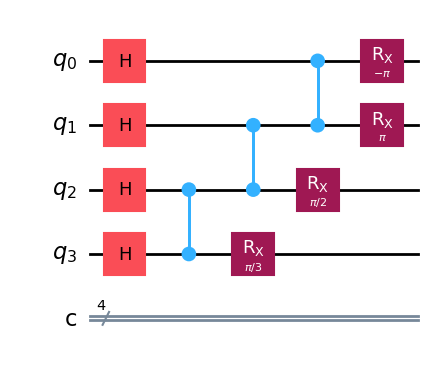

In [13]:
ansatz1([-np.pi, np.pi, np.pi/2, np.pi/3]).draw('mpl')

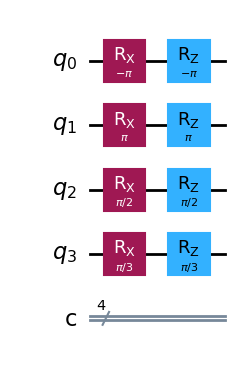

In [14]:
ansatz2(np.array([-np.pi, np.pi, np.pi/2, np.pi/3, -np.pi, np.pi, np.pi/2, np.pi/3])).draw('mpl')

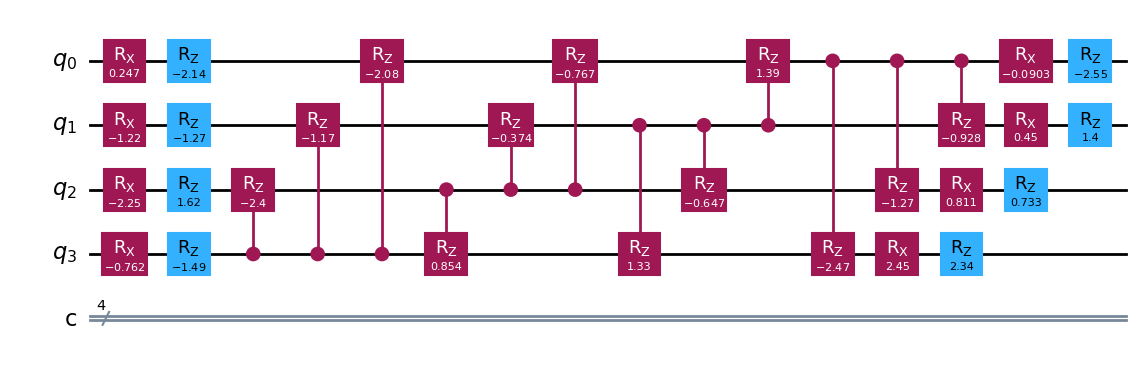

In [15]:
ansatz3(np.random.uniform(-np.pi, np.pi, 28)).draw('mpl')

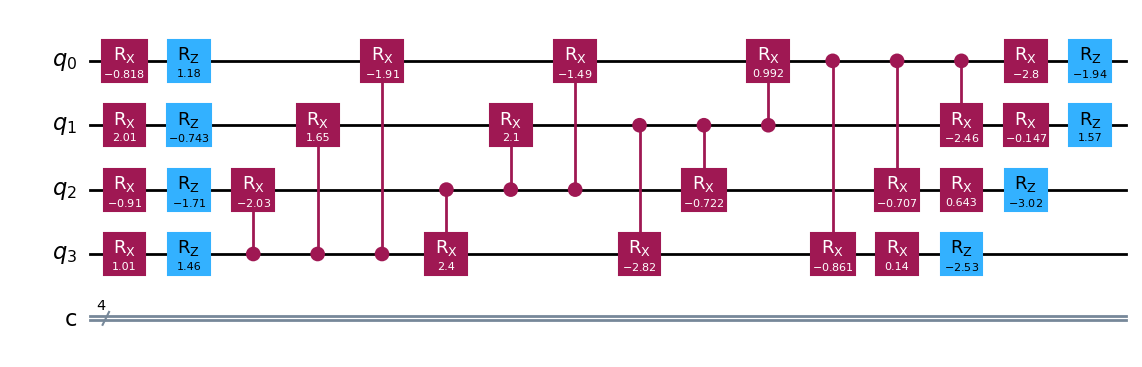

In [16]:
ansatz4(np.random.uniform(-np.pi, np.pi, 28)).draw('mpl')

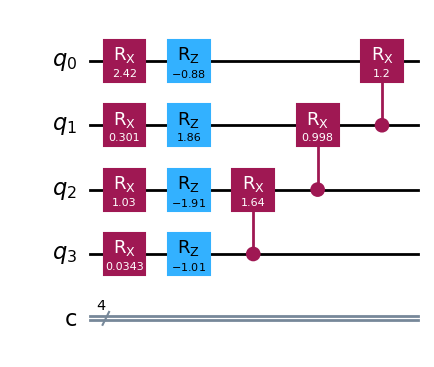

In [17]:
ansatz5(np.random.uniform(-np.pi, np.pi, 11)).draw('mpl')

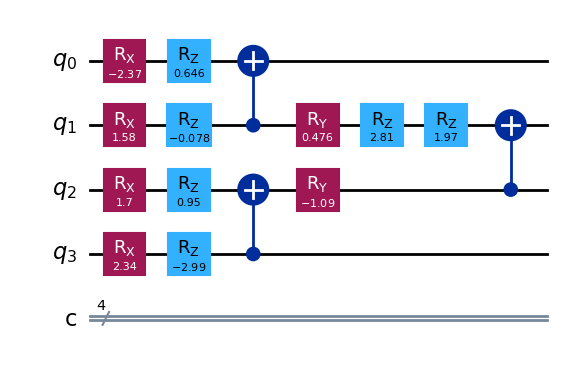

In [18]:
ansatz6(np.random.uniform(-np.pi, np.pi, 12)).draw('mpl')

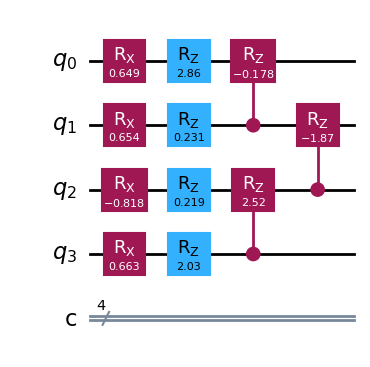

In [19]:
ansatz7(np.random.uniform(-np.pi, np.pi, 11)).draw('mpl')

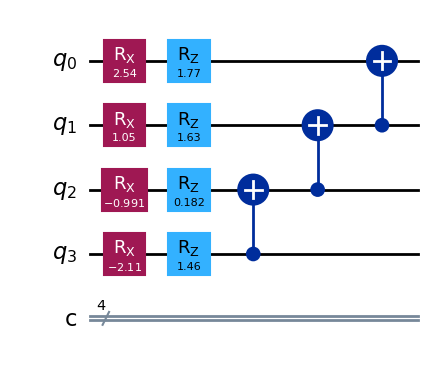

In [20]:
ansatz8(np.random.uniform(-np.pi, np.pi, 8)).draw('mpl')

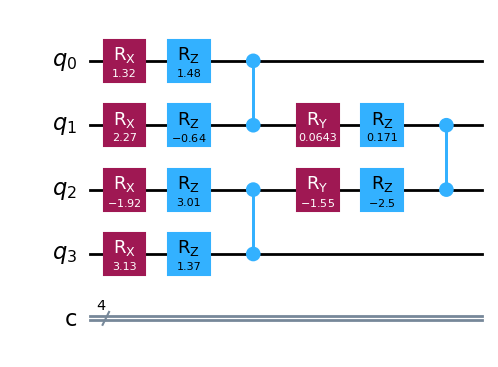

In [21]:
ansatz9(np.random.uniform(-np.pi, np.pi, 12)).draw('mpl')

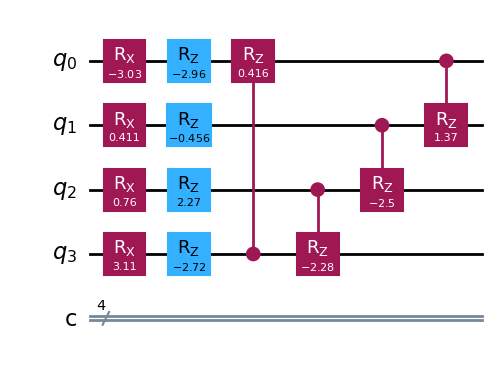

In [22]:
ansatz10(np.random.uniform(-np.pi, np.pi, 12)).draw('mpl')

In [23]:
def random_unitary(N):
    """
        Return a Haar distributed random unitary from U(N)
    """


    Z = np.random.randn(N, N) + 1.0j * np.random.randn(N, N)
    [Q, R] = sp.linalg.qr(Z)
    D = np.diag(np.diagonal(R) / np.abs(np.diagonal(R)))

    return np.dot(Q, D)


def haar_integral(num_qubits, samples):
    """
        Return calculation of Haar Integral for a specified number of samples.
    """


    N = 2**num_qubits
    randunit_density = np.zeros((N, N), dtype=complex)


    zero_state = np.zeros(N, dtype=complex)
    zero_state[0] = 1



    for _ in range(samples):
      A = np.matmul(zero_state, random_unitary(N)).reshape(-1,1)
      randunit_density += np.kron(A, A.conj().T)

    randunit_density/=samples

    return randunit_density



def pqc_integral(num_qubits, ansatze, size, samples):

    """
        Return calculation of Integral for a PQC over the uniformly sampled
        the parameters θ for the specified number of samples.
    """


    N = num_qubits
    randunit_density = np.zeros((2**N, 2**N), dtype=complex)


    for _ in range(samples):

      params = np.random.uniform(-np.pi, np.pi, size)
      ansatz = ansatze(params, N)
      result = execute(ansatz,

      backend=BasicAer.get_backend('statevector_simulator')).result()

      U = result.get_statevector(ansatz, decimals=5).reshape(-1,1)
      randunit_density += np.kron(U, U.conj().T)

    return randunit_density/samples

# Medindo expressibilidade e emaranhamento dos circuitos

In [45]:
import numpy as np
from qiskit import transpile
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.quantum_info import partial_trace, Statevector


# Function to generate a random unitary matrix
def random_unitary(dim):
    """Generate a random unitary matrix of dimension dim using QR decomposition."""
    Z = np.random.randn(dim, dim) + 1j * np.random.randn(dim, dim)
    Q, R = np.linalg.qr(Z)
    d = np.diagonal(R)
    Q *= d / np.abs(d)
    return Q

# Haar Integral Calculation
def haar_integral(num_qubits, samples):
    """
    Return the calculation of Haar Integral for a specified number of samples.
    """
    N = 2 ** num_qubits
    randunit_density = np.zeros((N, N), dtype=complex)

    zero_state = np.zeros(N, dtype=complex)
    zero_state[0] = 1

    for _ in tqdm(range(samples), desc="Calculando Haar Integral"):
        # Generate random unitary
        unitary = random_unitary(N)
        # Apply unitary to the zero state
        A = np.matmul(zero_state, unitary).reshape(-1, 1)
        # Accumulate density matrix
        randunit_density += np.kron(A, A.conj().T)

    # Normalize by number of samples
    randunit_density /= samples
    return randunit_density

# PQC Integral Calculation
def pqc_integral(num_qubits, ansatze, size, samples):
    """
    Return the calculation of Integral for a PQC over uniformly sampled
    parameters θ for the specified number of samples.
    """
    N = num_qubits
    randunit_density = np.zeros((2 ** N, 2 ** N), dtype=complex)

    for _ in  tqdm(range(samples), desc="Calculando PQC Integral"):
        # Sample random parameters
        params = np.random.uniform(-np.pi, np.pi, size)
        # Create the ansatz circuit with the given parameters
        ansatz = ansatze(params)
        # Simulate the circuit to get the statevector
        statevector = Statevector.from_instruction(transpile(ansatz, Aer.get_backend("qasm_simulator")))
        # Reshape statevector to column vector
        U = statevector.data.reshape(-1, 1)
        # Accumulate density matrix
        randunit_density += np.kron(U, U.conj().T)

    # Normalize by number of samples
    return randunit_density / samples


In [25]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz1, 4, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [03:14<00:00, 10.54it/s]


0.028469548802445056

In [26]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz2, 8, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [02:45<00:00, 12.34it/s]


0.028792258347000006

In [27]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz3, 28, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [02:48<00:00, 12.18it/s]


0.03135940380478421

In [28]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz4, 28, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [02:49<00:00, 12.11it/s]


0.031339079391543664

In [29]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz5, 11, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [02:48<00:00, 12.13it/s]


0.03132657648080139

In [30]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz6, 12, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [02:42<00:00, 12.64it/s]


0.030821467565312306

In [31]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz7, 11, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [02:44<00:00, 12.48it/s]


0.030508150076672576

In [33]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz8, 8, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [02:40<00:00, 12.79it/s]


0.03129274486266812

In [34]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz9, 12, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [02:40<00:00, 12.77it/s]


0.030077791390916615

In [35]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz10, 12, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [02:43<00:00, 12.51it/s]


0.02960207495149189

In [46]:
"""
def meyer_wallach(circuit, num_qubits, size, sample=1024):


        Returns the meyer-wallach entanglement measure for the given circuit.


    res = np.zeros(sample, dtype=complex)

    N = num_qubits


    for i in range(sample):

        params = np.random.uniform(-np.pi, np.pi, size)

        ansatz = circuit(params)

        result = execute(ansatz, backend=BasicAer.get_backend('statevector_simulator')).result()

        U = result.get_statevector(ansatz, decimals=5)

        entropy = 0

        qb = list(range(N))


        for j in range(N):

            dens = qiskit.quantum_info.partial_trace(U, qb[:j]+qb[j+1:]).data

            trace = np.trace(dens**2)

            entropy += trace


        entropy /= N

        res[i] = 1 - entropy



    return 2*np.sum(res).real/sample
  """

"\ndef meyer_wallach(circuit, num_qubits, size, sample=1024):\n\n\n        Returns the meyer-wallach entanglement measure for the given circuit.\n\n\n    res = np.zeros(sample, dtype=complex)\n\n    N = num_qubits\n\n\n    for i in range(sample):\n\n        params = np.random.uniform(-np.pi, np.pi, size)\n\n        ansatz = circuit(params)\n\n        result = execute(ansatz, backend=BasicAer.get_backend('statevector_simulator')).result()\n\n        U = result.get_statevector(ansatz, decimals=5)\n\n        entropy = 0\n\n        qb = list(range(N))\n\n\n        for j in range(N):\n\n            dens = qiskit.quantum_info.partial_trace(U, qb[:j]+qb[j+1:]).data\n\n            trace = np.trace(dens**2)\n\n            entropy += trace\n\n\n        entropy /= N\n\n        res[i] = 1 - entropy\n\n\n\n    return 2*np.sum(res).real/sample\n  "

In [49]:

def meyer_wallach(circuit, num_qubits, size, sample=1024):
    res = np.zeros(sample)
    N = num_qubits

    # Usar o simulador de estado vetorial do Aer para melhor performance
    backend = Aer.get_backend('statevector_simulator')

    for i in range(sample):
        params = np.random.uniform(-np.pi, np.pi, size)
        ansatz = circuit(params)

        # Obter o estado vetorial diretamente
        U = Statevector(ansatz)

        entropy = 0.0
        for j in range(N):
            # Manter o qubit j e traçar os outros
            dens = partial_trace(U, [j])
            purity = np.real(np.trace(dens.data @ dens.data))
            entropy += purity

        entropy /= N
        res[i] = 1 - entropy

    return 2 * np.mean(res)


In [50]:
meyer_wallach(ansatz1, num_qubits, 4)

1.0000000000000013

In [51]:
meyer_wallach(ansatz2, num_qubits, 8)

1.713039432527097e-17

In [52]:
meyer_wallach(ansatz3, num_qubits, 28)

0.27821163144512023

In [53]:
meyer_wallach(ansatz4, num_qubits, 28)

0.6828072838612175

In [54]:
meyer_wallach(ansatz5, num_qubits, 11)

0.30566298513634316

In [55]:
meyer_wallach(ansatz6, num_qubits, 12)

0.5288613023309559

In [56]:
meyer_wallach(ansatz7, num_qubits, 11)

0.1710174556449448

In [59]:
meyer_wallach(ansatz8, num_qubits, 8)

0.6160100546999295

In [60]:
meyer_wallach(ansatz9, num_qubits, 12)

0.3952380924326666

In [61]:
meyer_wallach(ansatz10, num_qubits, 12)

0.22786388194386906